In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
data_url = 'https://www.raphaelcousin.com/modules/module5/course/module5_course_handling_missing_values.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(data_url, 'module5_course_handling_missing_values.csv')

Downloaded module5_course_handling_missing_values.csv from https://www.raphaelcousin.com/modules/module5/course/module5_course_handling_missing_values.csv


In [3]:
df = pd.read_csv("module5_course_handling_missing_values.csv", sep=",", index_col=0)

## Data Analysis

DataFrame head:
                           RotorRPM  ReactivePower  GeneratorRPM  WindSpeed  \
2019-05-06 14:10:00+00:00  0.672715     -15.007223     68.210284   2.212693   
2019-05-06 14:30:00+00:00  0.508198     -10.851533     68.229411   2.130019   
2019-05-06 14:50:00+00:00  0.715614     -10.303578     85.012009   2.347810   
2019-05-06 15:00:00+00:00  0.550434     -12.594477     63.945036   2.161460   
2019-05-06 15:10:00+00:00  0.251628     -11.181515     21.339981   1.913490   

                           Blade1PitchAngle  AmbientTemperatue  ActivePower  
2019-05-06 14:10:00+00:00         45.736893          39.308243    -7.851491  
2019-05-06 14:30:00+00:00         41.260297          39.206277    -5.565284  
2019-05-06 14:50:00+00:00         39.576077          39.194184    -5.549332  
2019-05-06 15:00:00+00:00         47.399521          38.992667    -5.768376  
2019-05-06 15:10:00+00:00               NaN          38.686212    -5.091456  

DataFrame info:
<class 'pandas.core.fram

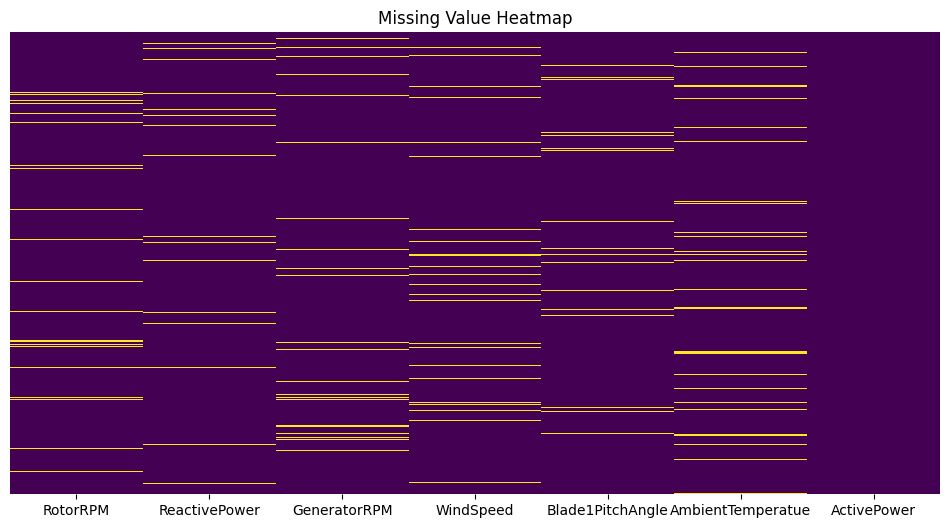

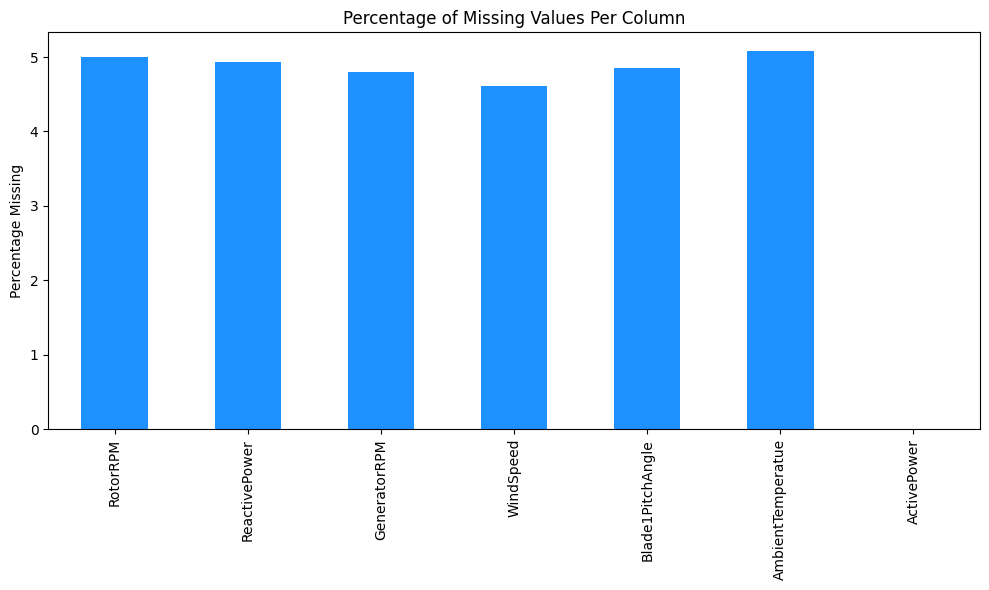


Correlation between missingness and target variable:
RotorRPM: -0.0049
ReactivePower: -0.0045
GeneratorRPM: -0.0062
WindSpeed: -0.0074
Blade1PitchAngle: -0.0022
AmbientTemperatue: 0.0097


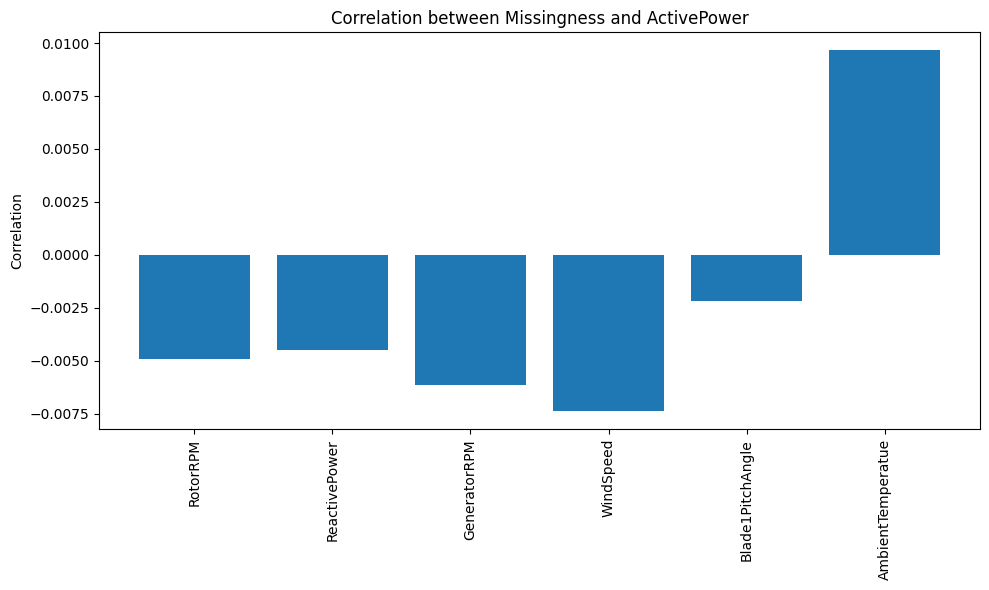

In [4]:
def analyze_missing_data(df, target_column='ActivePower'):
    # Print the first few rows of the DataFrame to understand its structure
    print("DataFrame head:")
    print(df.head())

    # Basic info about the dataset
    print("\nDataFrame info:")
    df.info()

    # Summarize missing values per column
    print("\nMissing values per column:")
    missing_data = df.isnull().sum()
    print(missing_data)

    # Percentage of missing values per column
    print("\nPercentage of missing values per column:")
    percent_missing = df.isnull().mean() * 100
    print(percent_missing)

    # Visualizing missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Value Heatmap')
    plt.show()

    # Visualizing percentage of missing values
    plt.figure(figsize=(10, 6))
    percent_missing.plot(kind='bar', color='dodgerblue')
    plt.title('Percentage of Missing Values Per Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Compute correlation between missingness and target variable
    missingness_correlation = {}
    for column in df.columns:
        if column != target_column and df[column].isnull().sum() > 0:
            correlation = df[column].isnull().corr(df[target_column])
            missingness_correlation[column] = correlation

    print("\nCorrelation between missingness and target variable:")
    for column, correlation in missingness_correlation.items():
        print(f"{column}: {correlation:.4f}")

    # Visualize correlation between missingness and target variable
    plt.figure(figsize=(10, 6))
    plt.bar(missingness_correlation.keys(), missingness_correlation.values())
    plt.title(f'Correlation between Missingness and {target_column}')
    plt.ylabel('Correlation')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_missing_data(df)

## Data Cleaning - Handling Missing Values

Average Results:

Mean Imputation:
  Train_mse: 15181.3279 ± 737.6934
  Test_mse: 24702.8462 ± 12932.7130
  Train_mae: 70.7434 ± 3.7371
  Test_mae: 83.6877 ± 17.9709

Median Imputation:
  Train_mse: 15955.3711 ± 686.2101
  Test_mse: 25087.0989 ± 12746.2499
  Train_mae: 73.1930 ± 3.3043
  Test_mae: 86.3593 ± 18.1474

Zero Imputation:
  Train_mse: 32025.2524 ± 4912.1138
  Test_mse: 32882.0570 ± 15354.2556
  Train_mae: 104.4991 ± 10.4343
  Test_mae: 111.8429 ± 9.5654

KNN Imputation:
  Train_mse: 1723.8109 ± 1078.3444
  Test_mse: 17028.2368 ± 25642.9760
  Train_mae: 14.9116 ± 3.8237
  Test_mae: 28.3751 ± 23.9752

Iterative Imputation:
  Train_mse: 2645.6901 ± 1095.8246
  Test_mse: 18518.7569 ± 25707.9874
  Train_mae: 18.6889 ± 3.5783
  Test_mae: 32.6056 ± 23.2676

Forward Fill Imputation:
  Train_mse: 3592.7623 ± 947.6550
  Test_mse: 17800.4107 ± 25007.8176
  Train_mae: 24.3274 ± 4.2771
  Test_mae: 38.2786 ± 21.7459


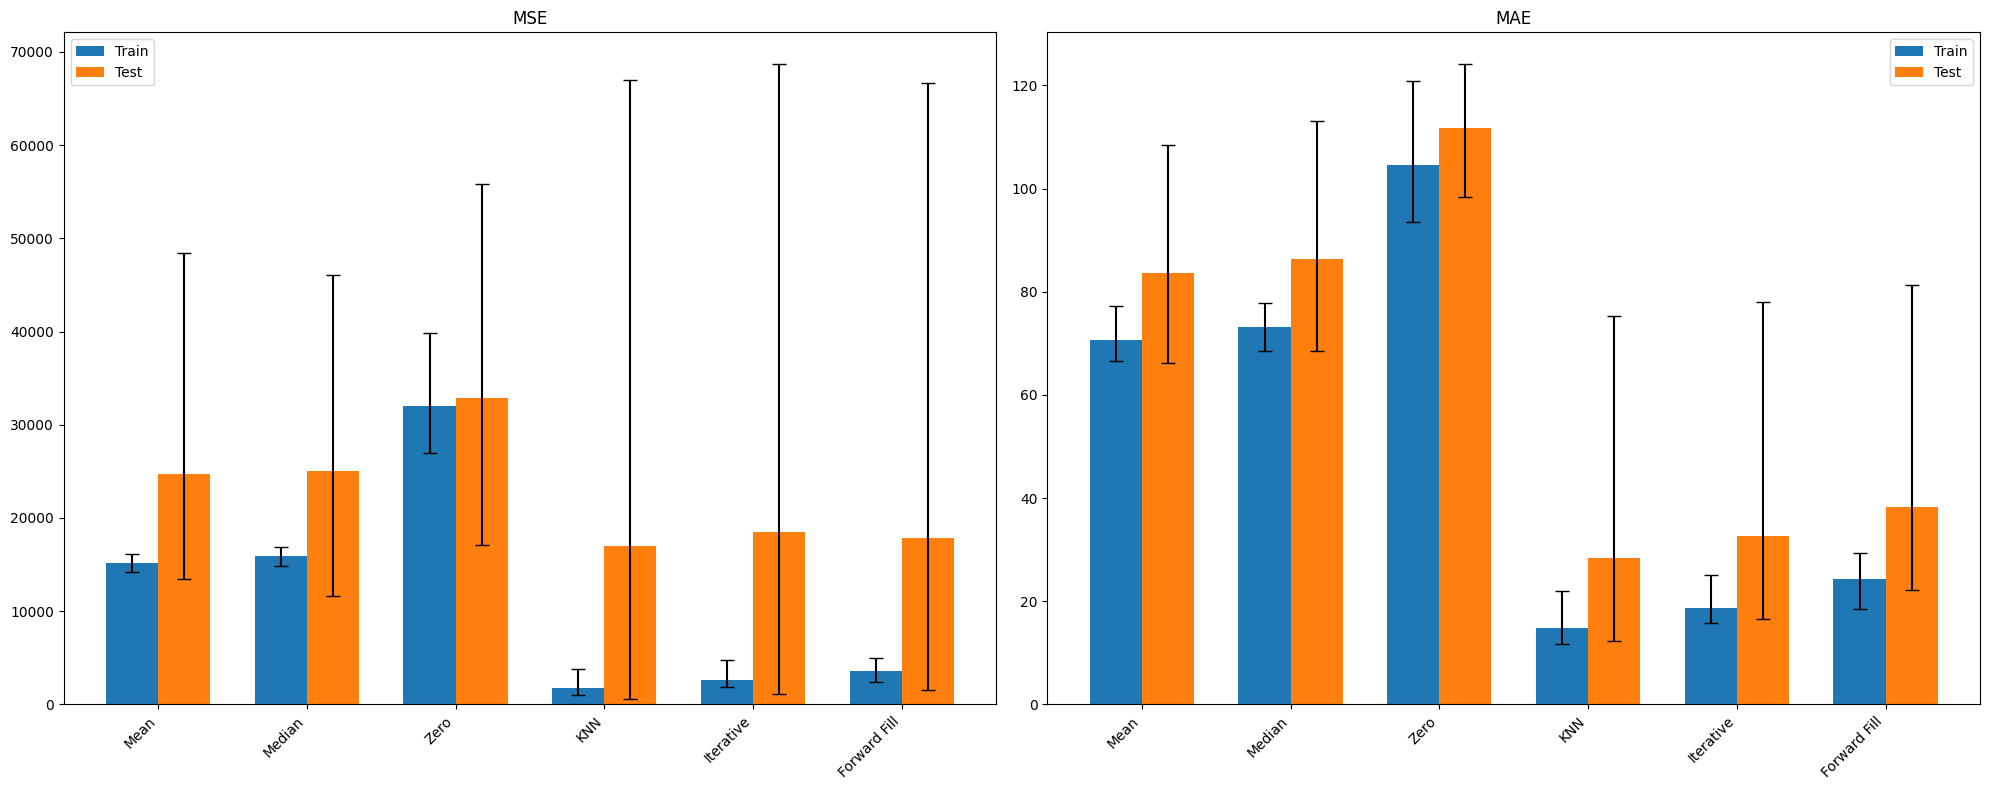

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error

def split_data(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    return tscv.split(X)

def impute_data(imputer, X_train, X_test, add_indicator=False):
    if add_indicator:
        imputer = SimpleImputer(add_indicator=True, strategy='mean')
    
    X_train_imputed = pd.DataFrame(
        imputer.fit_transform(X_train),
        columns=imputer.get_feature_names_out(X_train.columns),
        index=X_train.index
    )
    X_test_imputed = pd.DataFrame(
        imputer.transform(X_test),
        columns=imputer.get_feature_names_out(X_test.columns),
        index=X_test.index
    )
    return X_train_imputed, X_test_imputed

def ffill_impute(X_train, X_test):
    X_train_imputed = X_train.ffill()
    X_test_imputed = X_test.ffill()
    return X_train_imputed, X_test_imputed

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return {
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
    }

def plot_results(results):
    metrics = ['mse', 'mae']
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    for i, metric in enumerate(metrics):
        train_values = [np.mean(results[strategy][f'train_{metric}']) for strategy in results]
        test_values = [np.mean(results[strategy][f'test_{metric}']) for strategy in results]
        train_min = [np.min(results[strategy][f'train_{metric}']) for strategy in results]
        train_max = [np.max(results[strategy][f'train_{metric}']) for strategy in results]
        test_min = [np.min(results[strategy][f'test_{metric}']) for strategy in results]
        test_max = [np.max(results[strategy][f'test_{metric}']) for strategy in results]
        
        x = np.arange(len(results))
        width = 0.35
        
        axes[i].bar(x - width/2, train_values, width, 
                    yerr=[np.array(train_values) - np.array(train_min), 
                          np.array(train_max) - np.array(train_values)], 
                    label='Train', capsize=5)
        axes[i].bar(x + width/2, test_values, width, 
                    yerr=[np.array(test_values) - np.array(test_min), 
                          np.array(test_max) - np.array(test_values)], 
                    label='Test', capsize=5)
        
        axes[i].set_title(f'{metric.upper()}')
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(list(results.keys()), rotation=45, ha='right')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

# Assuming df is your dataset and 'ActivePower' is your target variable
X = df.drop('ActivePower', axis=1)
y = df['ActivePower']

# Define imputation strategies
imputers = {
    "Mean": SimpleImputer(strategy='mean'),
    "Median": SimpleImputer(strategy='median'),
    "Zero": SimpleImputer(strategy='constant', fill_value=0),
    "KNN": KNNImputer(n_neighbors=5),
    "Iterative": IterativeImputer(estimator=BayesianRidge(), random_state=0, max_iter=300),
    "Forward Fill": "ffill"
}

# Initialize results dictionary
results = {name: {'train_mse': [], 'test_mse': [], 'train_mae': [], 'test_mae': []} for name in imputers}

# Perform cross-validation
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, imputer in imputers.items():
        
        # Impute data
        if name == "Forward Fill":
            X_train_imputed, X_test_imputed = ffill_impute(X_train, X_test)
        else:
            X_train_imputed, X_test_imputed = impute_data(imputer, X_train, X_test)
        
        # Train and evaluate model
        model = LinearRegression()
        model.fit(X_train_imputed, y_train)
        fold_results = evaluate_model(model, X_train_imputed, X_test_imputed, y_train, y_test)
        
        for metric in ['train_mse', 'test_mse', 'train_mae', 'test_mae']:
            results[name][metric].append(fold_results[metric])
        # print(f"Evaluating {name} imputation:")
        # print(f"  Train MSE: {fold_results['train_mse']:.4f}")
        # print(f"  Test MSE: {fold_results['test_mse']:.4f}")
        # print(f"  Train MAE: {fold_results['train_mae']:.4f}")
        # print(f"  Test MAE: {fold_results['test_mae']:.4f}")
        # print()

# Calculate and print average results
print("Average Results:")
for name in imputers:
    print(f"\n{name} Imputation:")
    for metric in ['train_mse', 'test_mse', 'train_mae', 'test_mae']:
        mean_value = np.mean(results[name][metric])
        std_value = np.std(results[name][metric])
        print(f"  {metric.capitalize()}: {mean_value:.4f} ± {std_value:.4f}")

# Plot results
plot_results(results)